In [1]:
# importing useful libraries

import requests
import zipfile
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(42)

In [3]:
def download(url, file_name):
    """
    Downloads the dataset for project
    input:
    url (string): url for dataset
    file_name (string): file name in which downloaded dataset will be stored
    """
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(file_name, 'wb') as f:
            f.write(response.raw.read())

In [4]:
def extract_zip(s_path, d_path):
    """
    Extract (unzip) the compressed dataset for working
    input:
    s_path (string): path of zipped dataset
    d_path (string): path to store the unzipped dataset
    """
    with zipfile.ZipFile(s_path, 'r') as zip_ref:
        zip_ref.extractall(d_path)

In [5]:
def center_crop(image_path, size):
    """
    crop the image from center of the given size
    input:
    image_path (string): Path of image
    size (int): size to which the image being cropped from center
    """
    img = Image.open(image_path)
    img = img.resize((size+1,size+1))
    x_center = img.width/2
    y_center = img.height/2
    size = size/2
    cr = img.crop((x_center-size, y_center-size, x_center+size, y_center+size))

    return cr


In [6]:
img = Image.open("./images/cats/cats_0.jpg")
img.format, type(img)

('JPEG', PIL.JpegImagePlugin.JpegImageFile)

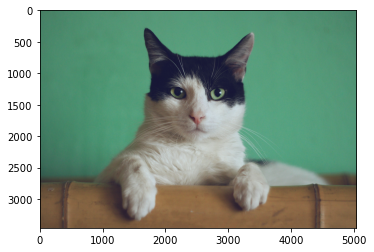

In [7]:
plt.imshow(img)

In [29]:
# define list of files
cat_list = os.listdir("images/cats")
dog_list = os.listdir("images/dogs")

In [30]:
cat_list = cat_list[:18]
dog_list = dog_list[:18]

In [31]:
train_list = []
train_list.extend(cat_list)
train_list.extend(dog_list)

In [33]:
np.random.shuffle(train_list)
try:
    train_list.remove('.ipynb_checkpoints')
    train_list.remove('.ipynb_checkpoints')
except:
    pass
train_list

['dogs_16.jpg',
 'dogs_0.jpg',
 'dogs_7.jpg',
 'cats_16.jpg',
 'dogs_11.jpg',
 'cats_9.jpg',
 'dogs_4.jpg',
 'cats_14.jpg',
 'cats_1.jpg',
 'cats_2.jpg',
 'dogs_13.jpg',
 'cats_17.jpg',
 'dogs_5.jpg',
 'dogs_9.jpg',
 'dogs_2.jpg',
 'dogs_17.jpg',
 'dogs_3.jpg',
 'cats_11.jpg',
 'cats_15.jpg',
 'cats_3.jpg',
 'cats_10.jpg',
 'cats_13.jpg',
 'dogs_1.jpg',
 'dogs_10.jpg',
 'cats_12.jpg',
 'dogs_15.jpg',
 'cats_5.jpg',
 'dogs_6.jpg',
 'dogs_14.jpg',
 'cats_7.jpg',
 'cats_4.jpg',
 'dogs_12.jpg',
 'cats_6.jpg',
 'cats_0.jpg']

In [36]:
l=len(train_list)

In [37]:
train_data = np.zeros((l,100*100*3))

In [38]:
for i, image_name in enumerate(train_list):
    if image_name.split("_")[0] == "dogs":
        path =  "./images/dogs"
    else:
        path =  "./images/cats"
    image_path = f'{path}/{image_name}'
    crp_img = center_crop(image_path,100)
    crp_arr = np.array(crp_img).reshape(-1)
    train_data[i] = crp_arr

In [39]:
train_data[0]

array([241., 173.,  20., ..., 250., 198.,  77.])

In [41]:
print("printing the name of some image")
print("-> ",train_list[0])
print("Splitting the image from all . characters into a list")
print("-> ",train_list[0].split("."))
print("selecting the 0th element of splitted list")
print("-> ",train_list[0].split("_")[0])

printing the name of some image
->  dogs_16.jpg
Splitting the image from all . characters into a list
->  ['dogs_16', 'jpg']
selecting the 0th element of splitted list
->  dogs


In [42]:
train_labels = np.array([0 if name.split("_")[0]=="cats" else 1 for name in train_list])

In [43]:
train_labels

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0])

In [44]:
model = LogisticRegression(max_iter=100, n_jobs=-1)

In [45]:
model.fit(train_data, train_labels)

LogisticRegression(n_jobs=-1)

In [46]:
model.score(train_data, train_labels)

1.0

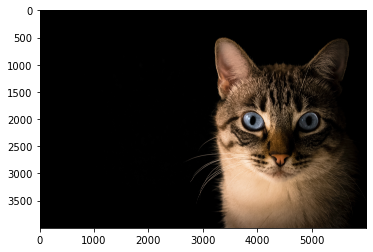

In [47]:
test_img = "./images/cats/cats_17.jpg"
img = Image.open(test_img)
plt.imshow(img)

In [48]:
im = center_crop(test_img,100) # cropping image
X = np.array(im).reshape(-1) # flattening the image to pass in model for prediction
X = X/255 # scale the pixels in 0-1 range

In [49]:
model.predict([X])

array([0])

In [50]:
train_pred = model.predict(train_data)
cm = confusion_matrix(train_pred, train_labels)
cm

array([[17,  0],
       [ 0, 17]])

<AxesSubplot:>

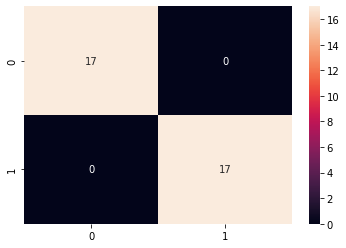

In [51]:
sns.heatmap(cm, annot=True)

In [52]:
def show_image(img_path):
    img = Image.open(img_path)
    plt.imshow(img)

In [66]:
def predict_custom_image(model, img_path):
    crp_img = center_crop(img_path,100)
    crp_arr = np.array(crp_img).reshape(1,-1)
    pred = model.predict(crp_arr)
    proba = model.predict_proba(crp_arr)
    if pred == 0:
        return "Cat", proba
    return "Dog", np.round(proba,4)


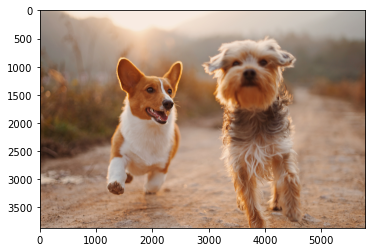

In [74]:
test_img_path = "images/unseens/test.jpg" # provide path to your custom image (make sure it's either jpg or jpeg)
show_image(test_img_path)

In [75]:
predict_custom_image(model, test_img_path)

('Dog', array([[0., 1.]]))